# Explicabilidad (SHAP)

### Librerias

In [1]:
# Librerías
import pandas as pd
import numpy as np
import sys
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from joblib import dump, load

import shap
shap.initjs()

import warnings
warnings.filterwarnings('ignore')

c:\Users\anazb\anaconda3\envs\env_ml\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Funciones

In [2]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 10000)
pd.set_option('display.width', 10000)

In [3]:
sys.path.append('../src/')
import functions as f
sys.path.remove('../src/')

In [4]:
# Constants
seed= 12345

### Carga de datos

In [6]:
df_loan_train = pd.read_csv("../data/df_train_resampled.csv")
df_loan_test = pd.read_csv("../data/data_test_processed.csv")

In [9]:
X_train = df_loan_train.drop('TARGET', axis=1)
y_train = df_loan_train['TARGET']

X_test = df_loan_test.drop('TARGET', axis=1)
y_test = df_loan_test['TARGET']

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((196803, 27), (196803,), (61503, 27), (61503,))

## **Aplicación Modelo SHAP**

ESTOY SIGUIENDO LO DE RAMON, HAAY QUE CAMBIARLO UN POCO

In [7]:
lgbm = load('../models/lgbm_model.joblib')
explainer = shap.TreeExplainer(lgbm)

### Generación de valores SHAP

In [10]:
shap_values = explainer.shap_values(X_test)
shap_values

array([[ 0.16832629,  0.06823647,  0.08398613, ...,  0.        ,
         0.00025234, -0.01162524],
       [ 0.13161554,  0.06677882,  0.09271378, ...,  0.        ,
         0.00025234,  0.11828404],
       [-0.05623977,  0.02815222,  0.05841603, ...,  0.        ,
         0.00025234, -0.0038469 ],
       ...,
       [ 0.19249913,  0.09980786,  0.07981602, ...,  0.        ,
         0.00025234, -0.01190539],
       [ 0.14575601,  0.07867277,  0.06076599, ...,  0.        ,
         0.00025234, -0.01087623],
       [ 0.08943841,  0.0699547 , -0.09931212, ...,  0.        ,
         0.00025234, -0.00712506]])

## **Explicabilidad gobal del modelo**

### Summary plot bar

In [12]:
explainer = shap.Explainer(lgbm, X_test)
shap_values = explainer(X_test, check_additivity=False)
# shap.plots.bar(shap_values)

100%|===================| 61432/61503 [04:04<00:00]        

### Summary plot bidireccional

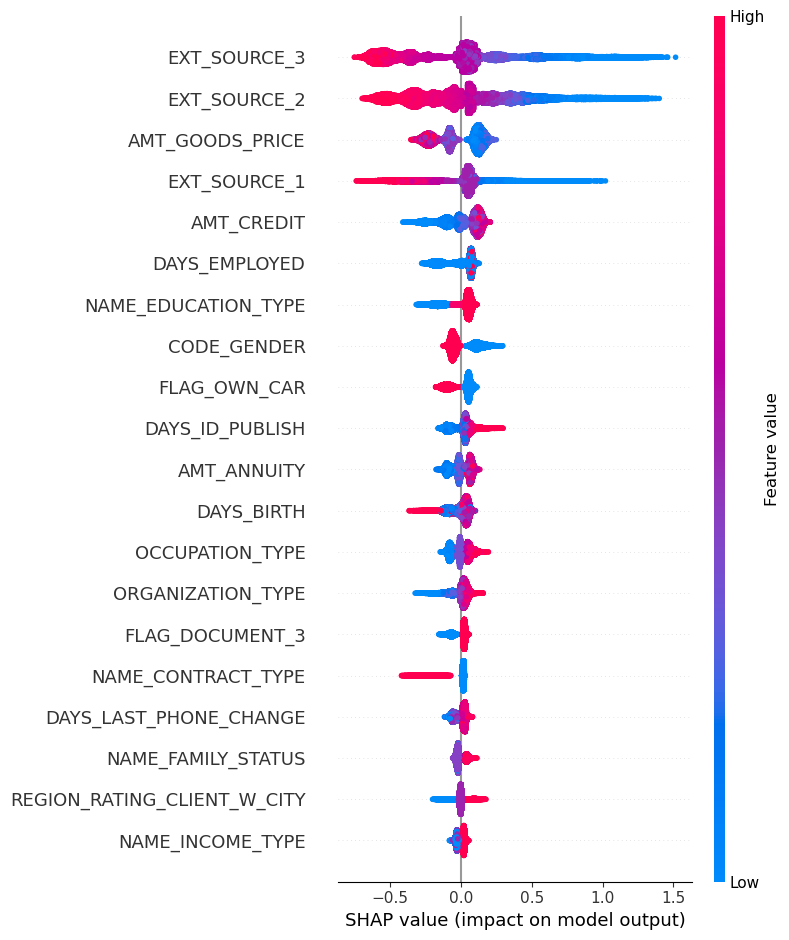

In [13]:
shap.summary_plot(shap_values, X_test)


### Force plot

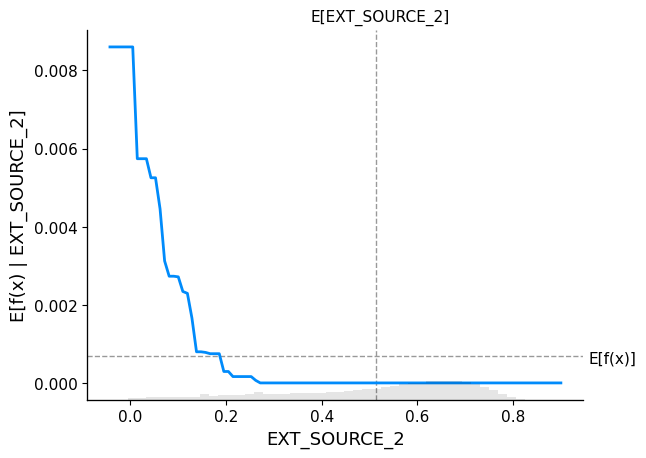

In [14]:
shap.partial_dependence_plot(
    "EXT_SOURCE_2",
    lgbm.predict,
    data=X_test,
    ice=False,
    model_expected_value=True,
    feature_expected_value=True,
)

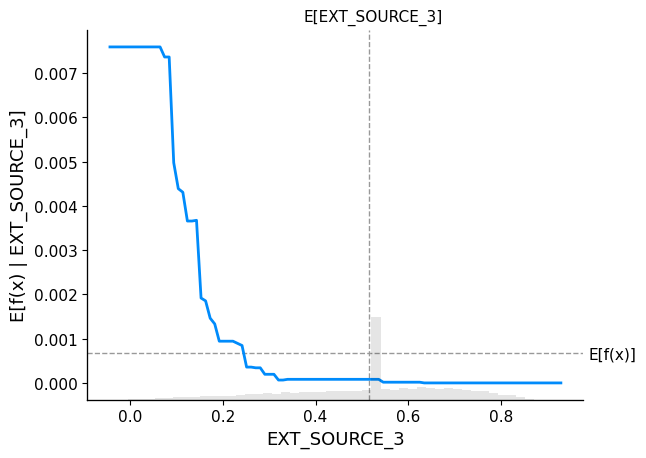

In [15]:
shap.partial_dependence_plot(
    "EXT_SOURCE_3",
    lgbm.predict,
    data=X_test,
    ice=False,
    model_expected_value=True,
    feature_expected_value=True,
)

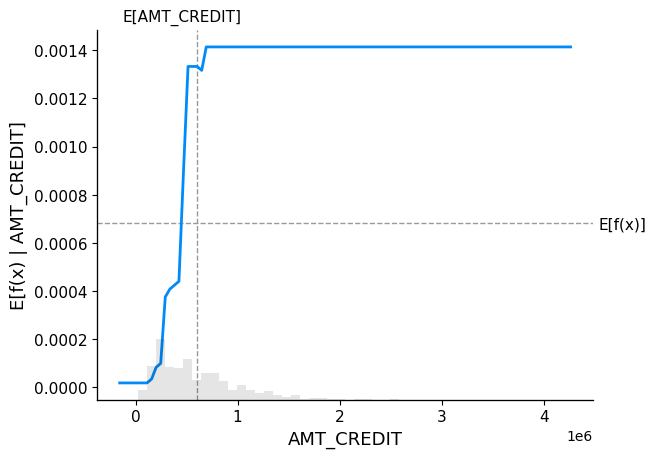

In [16]:
shap.partial_dependence_plot(
    "AMT_CREDIT",
    lgbm.predict,
    data=X_test,
    ice=False,
    model_expected_value=True,
    feature_expected_value=True,
)

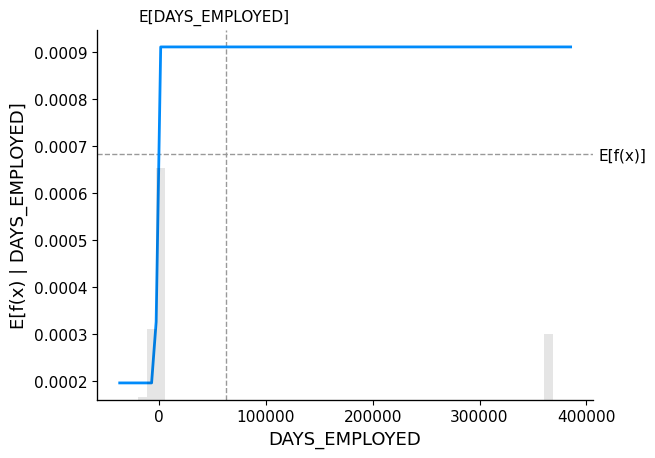

In [17]:
shap.partial_dependence_plot(
    "DAYS_EMPLOYED",
    lgbm.predict,
    data=X_test,
    ice=False,
    model_expected_value=True,
    feature_expected_value=True,
)

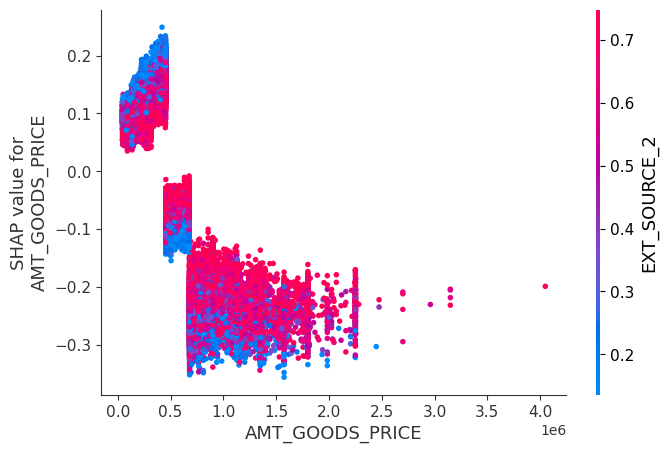

In [18]:
shap_values_array = shap_values.values if isinstance(shap_values, shap.Explanation) else shap_values
shap.dependence_plot('AMT_GOODS_PRICE', shap_values_array, X_test)

## **Explicabilidad local por instancia**

In [ ]:
shap_values_exp = explainer(X_test, check_additivity=False)
shap.force_plot(explainer.expected_value, shap_values_exp.values[0, :], X_test.iloc[0, :])

 82%|================    | 50663/61503 [03:23<00:43]       

In [ ]:
shap.force_plot(explainer.expected_value, shap_values_exp.values[2, :], X_test.iloc[2, :], check_additivity=False)

In [ ]:
shap.force_plot(explainer.expected_value, shap_values_exp.values[10, :], X_test.iloc[10, :], check_additivity=False)

In [ ]:

shap.force_plot(explainer.expected_value, shap_values_exp.values[100, :], X_test.iloc[100, :], check_additivity=False)

In [ ]:
shap_values_exp = shap.Explanation(shap_values, base_values=explainer.expected_value, data=X_test, check_additivity=False)
shap.plots.waterfall(shap_values_exp[0])

In [ ]:
shap.plots.waterfall(shap_values_exp[100])

### Conclusiones

El proceso de selección de variables y la reducción de dimensionalidad fueron etapas clave en la optimización de nuestro modelo predictivo. Tras evaluar diferentes técnicas, se concluyó que la selección de variables utilizando Boruta y regresiones logísticas (Ridge, Lasso y ElasticNet) fue el enfoque más eficaz. Esto permitió seleccionar un conjunto de variables relevantes sin perder información crucial. La reducción de dimensionalidad mediante PCA, aunque útil para la visualización, no aportó mejoras significativas en el rendimiento del modelo debido a la baja varianza explicada.

Por lo tanto, el modelo final se construyó con un conjunto optimizado de 16 variables seleccionadas, lo que mejoró la eficiencia y la capacidad predictiva sin sacrificar la precisión. En resumen, el enfoque de selección de variables fue fundamental para la creación de un modelo eficiente, mientras que la reducción de dimensionalidad no contribuyó significativamente al rendimiento.

En la evaluación de los modelos de clasificación, los más efectivos fueron los basados en árboles de decisión y boosting. Modelos como DecisionTreeClassifier(), LGBMClassifier(), XGBClassifier(), AdaBoostClassifier(), y GradientBoostingClassifier() sobresalieron en términos de precisión y capacidad de generalización, especialmente al aplicar técnicas de optimización de hiperparámetros. En particular, LGBMClassifier() y XGBClassifier() fueron las mejores opciones debido a su eficiencia computacional y capacidad para manejar datasets desequilibrados.

Modelos más simples, como DummyClassifier() y GaussianNB(), no ofrecieron buenos resultados, lo que subraya la importancia de emplear modelos más avanzados para tareas de clasificación complejas. La optimización de hiperparámetros mejoró significativamente el rendimiento de los modelos de boosting, lo que demuestra la importancia de ajustar estos parámetros para maximizar la efectividad de los modelos.

En resumen, LGBMClassifier() y XGBClassifier() se destacaron por su rendimiento, estabilidad y eficiencia computacional, siendo los modelos más recomendables para este análisis. Se recomienda seguir probando y ajustando los hiperparámetros para confirmar su efectividad a largo plazo.

En base a los análisis realizados, hemos observado que el modelo actual tiene un buen desempeño, pero aún se pueden mejorar ciertos aspectos, especialmente en la clasificación de la clase positiva (en particular, la reducción de falsos negativos). Para mejorar la precisión y obtener un modelo más robusto, hemos decidido optar por LightGBM.

LightGBM es un algoritmo de Gradient Boosting eficiente, conocido por su capacidad para manejar grandes volúmenes de datos, su velocidad de entrenamiento y su capacidad para manejar tanto variables categóricas como continuas. Además, LightGBM es ideal para tareas de clasificación binaria y puede mejorar el desempeño en el manejo de desequilibrio entre clases, lo cual es relevante en nuestro caso.